In [2]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #standardizing data
from sklearn.manifold import TSNE #TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\Aravindh\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Objective**

1. To do vectorization of words using BOW, TFIDF, AVGW2V, TFIDFW2V.

2. To do dimensionality reduction and visulase plots for +ve and -ve points and see if they're linearly seperable.

In [3]:
#connect the Database
con = sqlite3.connect('final.sqlite')

In [4]:
#read sql data using pandas
data = pd.read_sql('SELECT * FROM REVIEWS', con)

In [5]:
data.head() #visualise first five rows in data

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [6]:
# create database using only cleaned text and score of each reviews

df = pd.DataFrame(data, columns=['CleanedText', 'Score'])
df.describe()

,CleanedText,Score
count,364171,364171
unique,363249,2
top,sever year ago went tour celesti season tea fa...,positive
freq,13,307061


In [7]:
#about negative reviews
df[df['Score'] == 'negative'].describe()

,CleanedText,Score
count,57110,57110
unique,56943,1
top,fed dog iam proactiv health five year realiz u...,negative
freq,4,57110


In [8]:
#about positive reviews
df[df['Score'] == 'positive'].describe()

,CleanedText,Score
count,307061,307061
unique,306313,1
top,sever year ago went tour celesti season tea fa...,positive
freq,13,307061


In [9]:
#see first 5 rows of data
df.head()

,CleanedText,Score
0,witti littl book make son laugh loud recit car...,positive
1,grew read sendak book watch realli rosi movi i...,positive
2,fun way children learn month year learn poem t...,positive
3,great littl book read nice rhythm well good re...,positive
4,book poetri month year goe month cute littl po...,positive


In [10]:
#create two databases with equal number (2000) of +ve and -ve reviews and concatenate them as single dataset
df_1 = df[df['Score']=='positive'].head(2000)
df_2 = df[df['Score']=='negative'].head(2000)

In [11]:
#new dataset
df = pd.concat([df_1, df_2], ignore_index=True)
df.head()
df.shape

(4000, 2)

In [12]:
#seperate labels from text
label = df['Score']
df = df.drop('Score', axis=1)

In [13]:
label.shape

(4000,)

In [14]:
# new database with only text for word vectorisation
text = df['CleanedText']

In [15]:
text.shape

(4000,)

## Final

1. text = CleanedText (4000 reviews)
2. labels = positive or negative (2000 each)

**Now Need to do TSNE Plot for:** 
1. BOW
2. TFIDF
3. AVG-W2V
4. TFIDF-W2V

each T-sne plot is tried on different iterations and perplexity values

# BOW

In [16]:
bow = CountVectorizer().fit_transform(text.values)

In [19]:
import pickle
from sklearn.externals import joblib
joblib.dump(bow, 'bow.pkl') 

['bow.pkl']

In [20]:
bow = joblib.load('bow.pkl') 

In [21]:
print("the type of count vectorizer ",type(bow))
print("the shape of out text BOW vectorizer ",bow.get_shape())
print("the number of unique words ", bow.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (4000, 9592)
the number of unique words  9592


# TSNE ON BOW

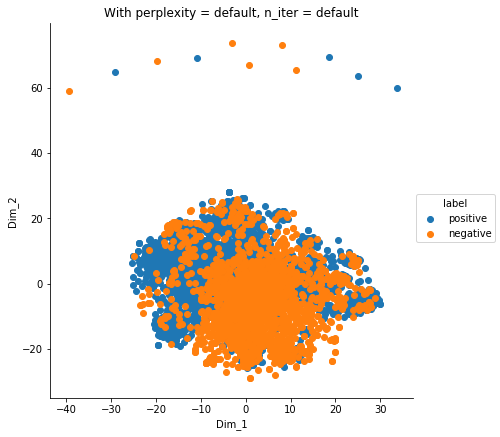

In [135]:
model = TSNE(n_components = 2, random_state=0)
t_data = bow.toarray() #to convert sparse matrix to dense matrix
tsne_data = model.fit_transform(t_data) #gives word vocabulary as matrix as[n_samples, n_features] i.e [reviews(rows), words(columns)] 

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T #vstack = arrange in row format.
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = default, n_iter = default')
plt.show()

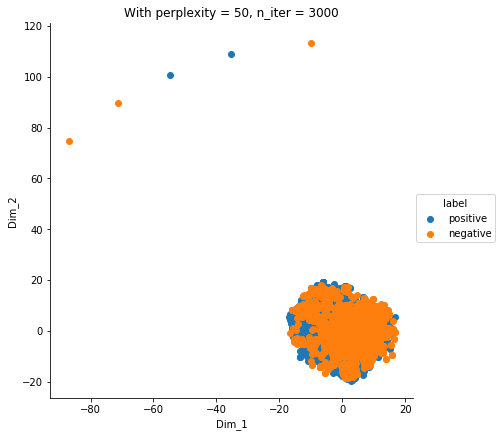

In [136]:
model = TSNE(n_components = 2, random_state=0, perplexity=50, n_iter=3000)
t_data = bow.toarray()
tsne_data = model.fit_transform(t_data)

#stacking bow and labels in columnwise
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter = 3000')
plt.show()

### Observations

1. Positive and Negative datas are overlapped and increase in number of iterations didnt produce any significant changes.

# TFIDF

In [139]:
tfidf = TfidfVectorizer().fit_transform(text.values)

In [178]:
import pickle
from sklearn.externals import joblib
joblib.dump(tfidf, 'tfidf.pkl') 

['tfidf.pkl']

In [140]:
print("the type of count vectorizer ",type(tfidf))
print("the shape of out text TFIDF vectorizer ",tfidf.get_shape())
print("the number of unique words including both unigrams and bigrams ", tfidf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (4000, 9592)
the number of unique words including both unigrams and bigrams  9592


In [141]:
tfidf.shape

(4000, 9592)

In [175]:
features = tf_idf_vect.get_feature_names()
print("some sample features(unique words in the corpus)",features[1995:2016])

some sample features(unique words in the corpus) ['custard', 'custodian', 'custom', 'cut', 'cute', 'cutest', 'cutter', 'cuz', 'cvb', 'cycl', 'cylind', 'cylindr', 'cystiti', 'daaainti', 'dab', 'dachi', 'dachshund', 'dad', 'daddi', 'daili', 'dairi']


In [165]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)

In [166]:
top_tfidf

,feature,tfidf
0,paperback,0.303202
1,rosi,0.303202
2,incorpor,0.292559
3,flimsi,0.258661
4,sendak,0.251916
5,page,0.227847
6,grew,0.220570
7,son,0.215629
8,book,0.197668
9,miss,0.192996


# TSNE on TFIDF

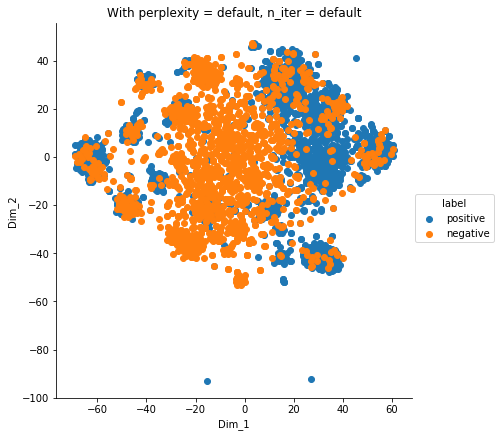

In [114]:
#TSNE PLOT
model = TSNE(n_components = 2, random_state=0)
t_data = tfidf.toarray()
tsne_data = model.fit_transform(t_data)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = default, n_iter = default')
plt.show()

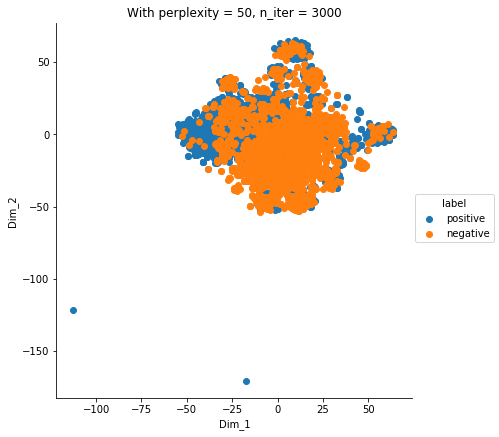

In [115]:
model = TSNE(n_components = 2, random_state=0, perplexity=50, n_iter=3000)
t_data = tfidf.toarray()
tsne_data = model.fit_transform(t_data)

#stacking bow and labels in columnwise
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter = 3000')
plt.show()

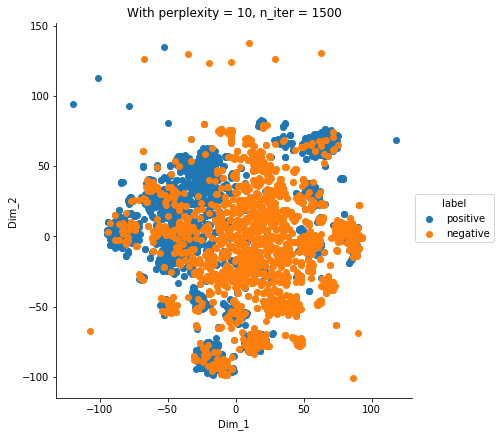

In [117]:
model = TSNE(n_components = 2, random_state=0, perplexity=10, n_iter=1500)
t_data = tfidf.toarray()
tsne_data = model.fit_transform(t_data)

#stacking bow and labels in columnwise
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 10, n_iter = 1500')
plt.show()

# Word2Vec

In [142]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in text.values:
    list_of_sent.append(sent.split())

In [143]:
print(text.values[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [145]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [146]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3259
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'hes', 'learn', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'movi', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep', 'page', 'open', 'fun', 'way', 'children', 'month', 'year']


# AVGW2V

In [151]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list

for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

4000
50


In [182]:
import pickle
from sklearn.externals import joblib
joblib.dump(sent_vectors, 'avgw2v.pkl') 

['avgw2v.pkl']

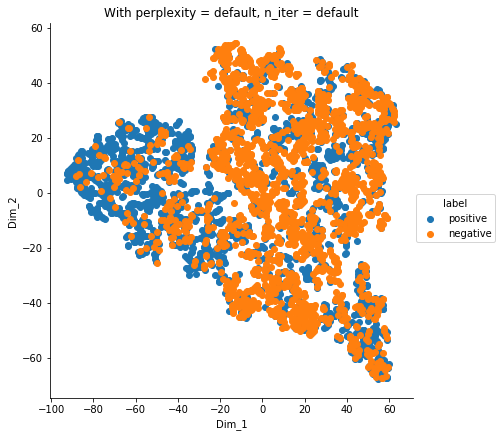

In [152]:
model = TSNE(n_components = 2, random_state=0)
#t_data = tfidf.toarray()
tsne_data = model.fit_transform(sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = default, n_iter = default')
plt.show()

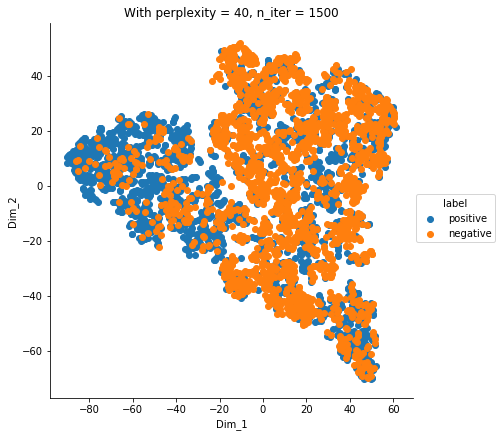

In [153]:
model = TSNE(n_components = 2, random_state=0, perplexity=40, n_iter=1500)
#t_data = tfidf.toarray()
tsne_data = model.fit_transform(sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter = 1500')
plt.show()

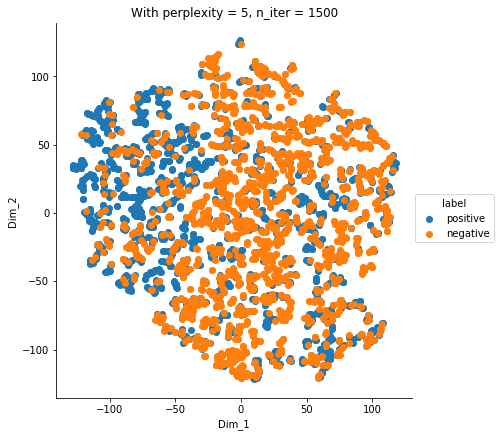

In [154]:
model = TSNE(n_components = 2, random_state=0, perplexity=5, n_iter=1500)
#t_data = tfidf.toarray()
tsne_data = model.fit_transform(sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 5, n_iter = 1500')
plt.show()

# TFIDF-W2V

In [159]:

tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(text.values)

# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
np.seterr(divide='ignore', invalid='ignore')
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [184]:
import pickle
from sklearn.externals import joblib
joblib.dump(tfidf_sent_vectors, 'tfidfw2v.pkl') 

['tfidfw2v.pkl']

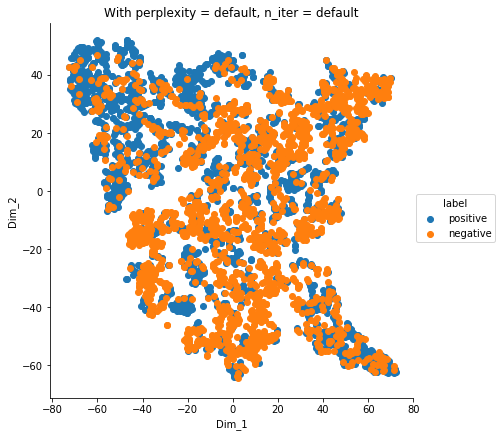

In [161]:
model = TSNE(n_components = 2, random_state=0)
tsne_data = model.fit_transform(tfidf_sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = default, n_iter = default')
plt.show()

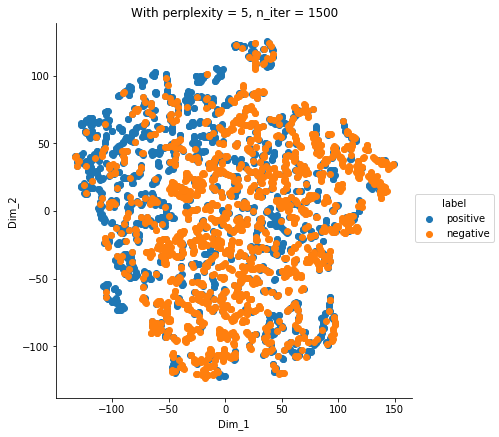

In [160]:
model = TSNE(n_components = 2, random_state=0, perplexity=5, n_iter=1500)
tsne_data = model.fit_transform(tfidf_sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 5, n_iter = 1500')
plt.show()

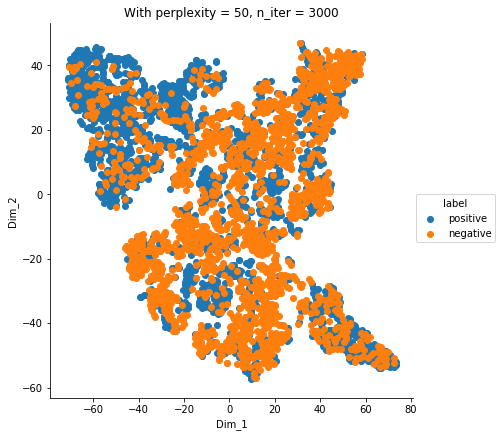

In [162]:
model = TSNE(n_components = 2, random_state=0, perplexity=50, n_iter=3000)
tsne_data = model.fit_transform(tfidf_sent_vectors)

#stacking bow and labels
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
#plot
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter = 3000')
plt.show()

# observations

1. cleaned text is used

2. 2000 reviews from each positive and negative are used

3. from bow, tfidf, tfidfW2V, avgW2V TSNE plot we can see Positive and Negative datas are overlapped and increase in number of iterations didnt produce any significant changes.

*tsne plot can be tried for various higher iteration too or different perplexity number, but it is stopped because of limited computation power of this system.